<a href="https://colab.research.google.com/github/betheman/DeepLearning/blob/master/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://medium.com/@randerson112358/classify-images-using-convolutional-neural-networks-python-a89cecc8c679
#https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

In [0]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [86]:
x_train.shape

(50000, 32, 32, 3)

In [42]:
y_train.shape

(50000, 1)

In [43]:
y_train[0]

array([6], dtype=uint8)

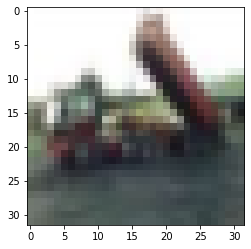

In [44]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[2])

In [0]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [88]:
y_train_one_hot.shape

(50000, 10)

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential() 

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax')) 

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_data=(x_test,y_test_one_hot) )

Epoch 1/10
196/196 [==============================] - 94s 482ms/step - loss: 1.5636 - accuracy: 0.4320 - val_loss: 1.4072 - val_accuracy: 0.5050
Epoch 2/10
196/196 [==============================] - 90s 459ms/step - loss: 1.2001 - accuracy: 0.5742 - val_loss: 1.0800 - val_accuracy: 0.6202
Epoch 3/10
196/196 [==============================] - 90s 458ms/step - loss: 1.0460 - accuracy: 0.6321 - val_loss: 1.0623 - val_accuracy: 0.6260
Epoch 4/10
196/196 [==============================] - 89s 457ms/step - loss: 0.9472 - accuracy: 0.6685 - val_loss: 0.9786 - val_accuracy: 0.6610
Epoch 5/10
196/196 [==============================] - 91s 463ms/step - loss: 0.8522 - accuracy: 0.7021 - val_loss: 0.9698 - val_accuracy: 0.6675
Epoch 6/10
196/196 [==============================] - 90s 458ms/step - loss: 0.7646 - accuracy: 0.7340 - val_loss: 0.9199 - val_accuracy: 0.6879
Epoch 7/10
196/196 [==============================] - 91s 465ms/step - loss: 0.6852 - accuracy: 0.7641 - val_loss: 0.9065 - val_ac

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
hist.history

{'accuracy': [0.43195998668670654,
  0.5741999745368958,
  0.6320800185203552,
  0.6684799790382385,
  0.7021200060844421,
  0.733959972858429,
  0.7641199827194214,
  0.7912999987602234,
  0.8133000135421753,
  0.8417999744415283],
 'loss': [1.563563346862793,
  1.200135588645935,
  1.045950174331665,
  0.9472160935401917,
  0.8521643877029419,
  0.7645896077156067,
  0.6851885914802551,
  0.6075211763381958,
  0.5414174199104309,
  0.45950308442115784],
 'val_accuracy': [0.5049999952316284,
  0.620199978351593,
  0.6259999871253967,
  0.6610000133514404,
  0.6675000190734863,
  0.6879000067710876,
  0.6990000009536743,
  0.7174000144004822,
  0.7226999998092651,
  0.72079998254776],
 'val_loss': [1.4071731567382812,
  1.0800352096557617,
  1.062265157699585,
  0.978570818901062,
  0.9697718620300293,
  0.9198924899101257,
  0.9064513444900513,
  0.854529082775116,
  0.8345668911933899,
  0.8738671541213989]}

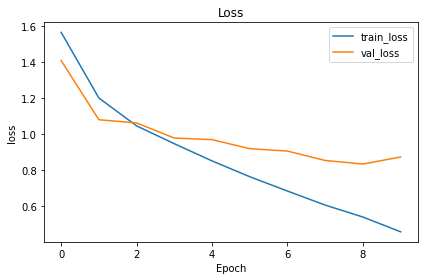

In [53]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend(['train_loss','val_loss'],loc='upper right')
plt.tight_layout()

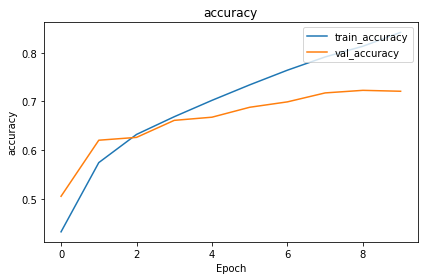

In [54]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend(['train_accuracy','val_accuracy'],loc='upper right')
plt.tight_layout()

In [0]:
my_image = plt.imread("/content/drive/My Drive/Colab Notebooks/Data/images/Cat03.jpg")

In [56]:
my_image.shape

(1199, 1200, 3)

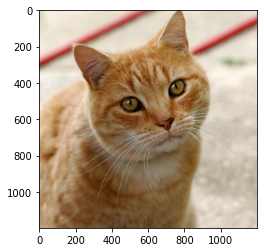

In [57]:
img = plt.imshow(my_image)

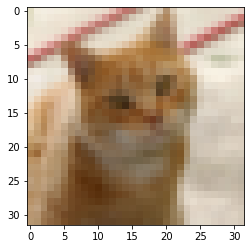

In [58]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3)) 
img = plt.imshow(my_image_resized) 

In [0]:
import numpy as np

In [0]:
probabilities = model.predict(np.array( [my_image_resized] ))

In [73]:
probabilities

array([[3.3147124e-05, 1.3037744e-07, 3.0526419e-03, 1.2236529e-01,
        2.7315937e-02, 8.4247935e-01, 1.6765122e-03, 3.0735282e-03,
        1.1148292e-06, 2.3512084e-06]], dtype=float32)

In [0]:
out_arr = np.argsort(probabilities) 

In [75]:
out_arr

array([[1, 8, 9, 0, 6, 2, 7, 4, 3, 5]])

In [0]:
my_image = plt.imread("/content/drive/My Drive/Colab Notebooks/Data/images/aeroplane.jpg")

In [0]:
resized_image=resize(my_image,(32,32,3))

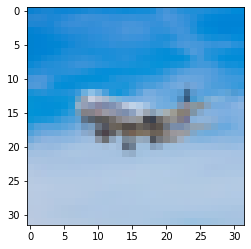

In [78]:
plt.imshow(resized_image)

In [0]:
probabilities = model.predict(np.array( [resized_image] ))

In [80]:
np.argsort(probabilities)

array([[6, 1, 5, 3, 8, 7, 9, 4, 2, 0]])

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/Models/CNN/rbg.h5')